# Import Packages and Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
from PIL import Image

In [2]:
import torch
from torchvision import datasets, transforms

In [3]:
# Label mapping for Y
# img_label_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
# classes = len (img_label_mapping)
# classes

6

In [3]:
def is_colab():
  try:
    import google.colab
    return True
  except ImportError:
    return False

# Example usage:
is_colab = is_colab()
is_colab

True

# Load data

## Load from file

In [4]:
if is_colab == True:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
if is_colab == True:
  path = '/content/drive/MyDrive/GeorgiaTech/08_DL_CS7643/Project/Data/intel_image'
  sys.path.append (path)
  data_path = path + '/raw_data/'
else:
  data_path = 'data/intel_image/raw_data/'

In [ ]:
# def get_data (type='training'):
#     _df_X = pd.read_parquet(data_path + type + '_X.parquet')
#     _df_X['X'] = _df_X['X_flat'].apply(lambda x: x.reshape(100, 100, 3))
#     if type != 'pred':
#         _df_Y = pd.read_parquet(data_path + type + '_Y.parquet')
#         return pd.DataFrame({'X': _df_X['X'], 'Y': _df_Y['Y']})
#     else:
#         return pd.DataFrame({'X': _df_X['X']})

In [ ]:
# df_train = get_data('training')
# df_test  = get_data('testing')
# df_pred  = get_data('pred')
# print (df_train.info())
# print ('\n')
# print (df_test.info())
# print ('\n')
# print (df_pred.info())

In [6]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

In [7]:
train_data = datasets.ImageFolder(data_path + 'seg_train', transform=transform)
test_data = datasets.ImageFolder(data_path + 'seg_test', transform=transform)

In [8]:
batch_size = 32

In [35]:
# use the ImageFolder dataset to create the DataLoader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [26]:
print (type (train_data))
print (f'Length of Train data & Test data = {len (train_data)} & {len (test_data)}' )
print (f'Image shape = {train_data[0][0].shape}') # 3, 224, 224 (RGB, 224x224)
print (f'Number of classes = {len (train_data.classes)}')
print (f'Classes = {train_data.classes}')
print (f'Class to index mapping = {train_data.class_to_idx}')
for i in range (len (train_data.classes)):
    print (f'Number of images per class {i} = {train_data.targets.count(i)}')

print (f'Label of first image = {train_data[0][1]} ;  Class = {train_data.classes[train_data[0][1]]}')

<class 'torchvision.datasets.folder.ImageFolder'>
Length of Train data & Test data = 14034 & 3000
Image shape = torch.Size([3, 224, 224])
Number of classes = 6
Classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Class to index mapping = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Number of images per class 0 = 2191
Number of images per class 1 = 2271
Number of images per class 2 = 2404
Number of images per class 3 = 2512
Number of images per class 4 = 2274
Number of images per class 5 = 2382
Label of first image = 0 ;  Class = buildings


In [33]:
# type (train_data.class_to_idx)
train_data.class_to_idx.items()

dict_items([('buildings', 0), ('forest', 1), ('glacier', 2), ('mountain', 3), ('sea', 4), ('street', 5)])

In [63]:
# train_data[0][0].shape[1:3] == (224,224)
train_data[0][0].shape  == (3,224,224)

True

In [10]:
# # Are all train_data in shape 3,224,224?
# for i in range (len (train_data)):
#     if train_data[i][0].shape  != (3,224,224):
#       print (f"Image {i} has shape {train_data[i][0].shape}")

In [45]:
print (train_data[0][1])
print (len (train_data[0]))

0
2


In [14]:
print (type (train_loader))
print (len (train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
439


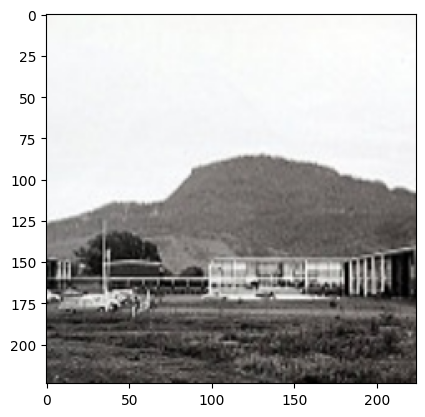

In [36]:
plt.imshow (train_data[0][0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

## Test the image load

In [37]:
# Run this to test your data loader
images, labels = next(iter(train_loader))

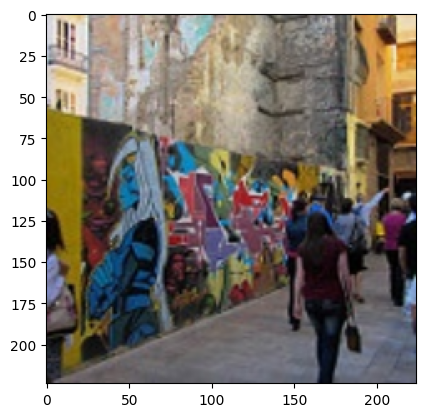

In [38]:
plt.imshow (images[0].permute(1, 2, 0))  # permute to change the order of the dimensions from (C, W, H) to (W, H, C)

In [18]:
print (labels[0])
print (labels[0].item())

tensor(5)
5


In [39]:
def print_images (df_images, df_labels, n=15, nrow=3, title='Intel Images'):
    ncol = int (n/nrow)
    if nrow==5:
      figsize = (20,20)
    else:
      figsize = (15,15)
    fig, ax = plt.subplots (nrows=nrow, ncols=ncol, figsize=figsize)
    fig.suptitle(title)
    for i in range(n):
        # idx = np.random.randint(0, len(df_image))

        _row = i//ncol
        _col = i%ncol
        ax[_row,_col].imshow(df_images[i].permute(1, 2, 0))
        # ax[_row,_col].set_title(img_label_mapping[df_labels[i].item()] )
        ax[_row,_col].set_title(train_data.classes[df_labels[i].item()])
        ax[_row,_col].axis('off')

In [12]:
# _images = 16
# print_images (train_data [0:_images,0], train_data [0:_images,1],_images,4)  #16 images in 4 row


TypeError: list indices must be integers or slices, not tuple

In [40]:
# print_images (images, labels,16,4)  #16 images in 4 row
print_images (images, labels,25,5)  #25 images in 5 row

Output hidden; open in https://colab.research.google.com to view.

# Vision Transformer VTi model

inspired by :
https://colab.research.google.com/drive/1eQS3NZ8gPhTGd98o88rKZ0nYZJMg7Ujq#scrollTo=b6676a19

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
from torch.utils.data         import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [11]:
import torchvision
import torchvision.transforms as T
import torchvision.models as models
import torchvision.transforms as T
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

In [12]:
# Hyper parameter
batch_size = 32


## Define data loaders

In [13]:
# percentage of training set to use as validation
valid_size = 0.2

# get training indices that wil be used for validation
train_size = len(train_data)
indices = list(range(train_size))
np.random.shuffle(indices)
split = int(np.floor(valid_size * train_size))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers to obtain training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [14]:
print (f"Original train data = {train_size}, \nAfter split 80:20 : {train_size-split} & {split}")

Original train data = 14034, 
After split 80:20 : 11228 & 2806


In [47]:
# # print out classes statistics

# # get all training samples labels
# train_labels = [labels for i, (images, labels) in enumerate(train_loader)]
# train_labels = torch.cat((train_labels), 0)
# train_labels_count = train_labels.unique(return_counts=True)

# # print(train_labels_count)

# print('The number of samples per classes in training dataset:\n')
# for label, count in zip(train_labels_count[0], train_labels_count[1]):
#     print('\t {}: {}'.format(label, count))

# # get all test samples labels
# test_labels = [labels for i, (images, labels) in enumerate(test_loader)]
# test_labels = torch.cat((test_labels), 0)
# test_labels_count = test_labels.unique(return_counts=True)

# print()
# print('The number of samples per classes in test dataset:\n')
# for label, count in zip(test_labels_count[0], test_labels_count[1]):
#     print('\t {}: {}'.format(label, count))

## Transformer model

In [15]:
# define model
vision_transformer = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
vision_transformer

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 174MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [16]:
# vit-16 model is trained on ImageNet
# we expect to have output of 1000 number of classes

vision_transformer.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [20]:
classes = len (train_data.classes)
classes

6

In [21]:
# fine-tune with dataset

# change the number of output classes
vision_transformer.heads = nn.Linear(in_features=768, out_features=classes, bias=True)

# freeze the parameters except the last linear layer
#
# freeze weights
for p in vision_transformer.parameters():
    p.requires_grad = False

# unfreeze weights of classification head to train
for p in vision_transformer.heads.parameters():
    p.requires_grad = True

In [22]:
# check whether corresponding layers are frozen

for layer_name, p in vision_transformer.named_parameters():
    print('Layer Name: {}, Frozen: {}'.format(layer_name, not p.requires_grad))
    print()

Layer Name: class_token, Frozen: True

Layer Name: conv_proj.weight, Frozen: True

Layer Name: conv_proj.bias, Frozen: True

Layer Name: encoder.pos_embedding, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_1.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_1.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.in_proj_weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.in_proj_bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.out_proj.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.self_attention.out_proj.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_2.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.ln_2.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.0.weight, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.0.bias, Frozen: True

Layer Name: encoder.layers.encoder_layer_0.mlp.3.weight, Fro

In [23]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# define optimizer
# only train the parameters with requires_grad set to True
optimizer = optim.Adam(filter(lambda p: p.requires_grad, vision_transformer.parameters()), lr=0.0001)


In [24]:
# Check for a GPU
train_on_gpu = torch.cuda.is_available()
train_on_gpu

True

=======================

In [ ]:
# first_rows = df_train.iloc[0:16]
# first_rows
# images = first_rows['X']
# targets = first_rows['Y']
# len (images)

16

In [ ]:
# image_resize =  cv2.resize (images[0], (16,14))

In [ ]:
# image_size = 224

# # define transform
# transform = T.Compose([ T.Resize(image_size), T.ToTensor() ])

In [ ]:
# # image_tensor = transform(images[0])
# # Convert the numpy array to a PIL Image before applying the transform
# image_tensor = transform(Image.fromarray(images[0].astype(np.uint8)))

In [ ]:
# # prompt: create a new variable to resize image of  df_train.iloc[0]['X'] to image size = 224 and transform it to a Tensor.

# # Assuming df_train.iloc[0]['X'] is a NumPy array representing an image

# image_tensor = transform(image_resize)

# # Check if the image tensor is on the GPU if available, otherwise keep it on the CPU
# if train_on_gpu:
#     image_tensor = image_tensor.cuda()

# resized_image_tensor = image_tensor

NameError: name 'image_resize' is not defined

In [ ]:
# images_tensor = torch.tensor(images)
# targets_tensor = torch.tensor (targets)

<ipython-input-29-6bd194c32d40>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  images_tensor = torch.tensor(images)


==============================

In [ ]:
# image_size = 224

# # define transform
# transform = T.Compose([ T.Resize(image_size), T.ToTensor() ])

# # Function to transform a single NumPy array image
# def transform_image(image_np):
#     """Transforms a single NumPy array image to a PyTorch tensor."""
#     image_pil = Image.fromarray(image_np.astype(np.uint8))
#     return transform(image_pil)

In [25]:
# Train model

# number of epochs
n_epoch = 1

train_loss_list, valid_loss_list = [], []

# move model to GPU
if train_on_gpu:
    vision_transformer.to('cuda')

# prepare model for training
vision_transformer.train()

for e in range(n_epoch):
    train_loss = 0.0
    valid_loss = 0.0

    # get batch data
    for i, (images, targets) in enumerate(train_loader):
        print (f'Batch {i+1} of {len(train_loader)}')

        # move to gpu if available
        if train_on_gpu:
            images, targets = images.to('cuda'), targets.to('cuda')

        # clear grad
        optimizer.zero_grad()

        # feedforward data
        outputs = vision_transformer(images)

        # calculate loss
        loss = criterion(outputs, targets)

        # backward pass, calculate gradients
        loss.backward()

        # update weights
        optimizer.step()

        # track loss
        train_loss += loss.item()

    # set model to evaluation mode
    vision_transformer.eval()

    print ('Validating model')

    # validate model
    for images, targets in valid_loader:

        # move to gpu if available
        if train_on_gpu:
            images = images.to('cuda')
            targets = targets.to('cuda')

        # turn off gradients
        with torch.no_grad():

            outputs = vision_transformer(images)
            loss = criterion(outputs, targets)
            valid_loss += loss.item()

    # set model back to training mode
    vision_transformer.train()

    # get average loss values
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)

    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)

    # output training statistics for epoch
    print('Epoch: {} \t Training Loss: {:.6f} \t Validation Loss: {:.6f}'
                  .format( (e+1), train_loss, valid_loss))



Batch 1 of 351
Batch 2 of 351
Batch 3 of 351
Batch 4 of 351
Batch 5 of 351
Batch 6 of 351
Batch 7 of 351
Batch 8 of 351
Batch 9 of 351
Batch 10 of 351
Batch 11 of 351
Batch 12 of 351
Batch 13 of 351
Batch 14 of 351
Batch 15 of 351
Batch 16 of 351
Batch 17 of 351
Batch 18 of 351
Batch 19 of 351
Batch 20 of 351
Batch 21 of 351
Batch 22 of 351
Batch 23 of 351
Batch 24 of 351
Batch 25 of 351
Batch 26 of 351
Batch 27 of 351
Batch 28 of 351
Batch 29 of 351
Batch 30 of 351
Batch 31 of 351
Batch 32 of 351
Batch 33 of 351
Batch 34 of 351
Batch 35 of 351
Batch 36 of 351
Batch 37 of 351
Batch 38 of 351
Batch 39 of 351
Batch 40 of 351
Batch 41 of 351
Batch 42 of 351
Batch 43 of 351
Batch 44 of 351
Batch 45 of 351
Batch 46 of 351
Batch 47 of 351
Batch 48 of 351
Batch 49 of 351
Batch 50 of 351
Batch 51 of 351
Batch 52 of 351
Batch 53 of 351
Batch 54 of 351
Batch 55 of 351
Batch 56 of 351
Batch 57 of 351
Batch 58 of 351
Batch 59 of 351
Batch 60 of 351
Batch 61 of 351
Batch 62 of 351
Batch 63 of 351
B

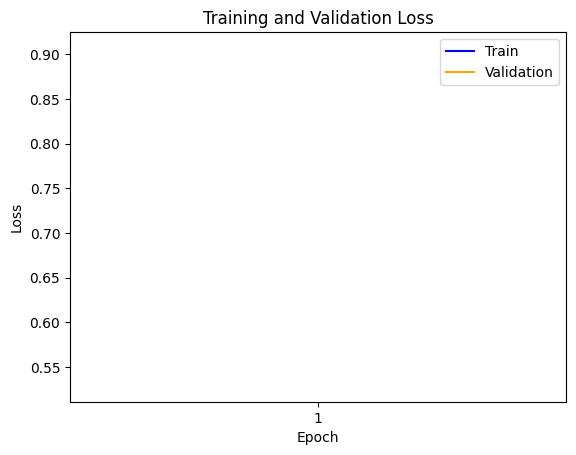

In [26]:
# visualize loss statistics

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# plot losses
x = list(range(1, n_epoch + 1))
plt.plot(x, train_loss_list, color ="blue", label='Train')
plt.plot(x, valid_loss_list, color="orange", label='Validation')
plt.legend(loc="upper right")
plt.xticks(x)

plt.show()

In [28]:
# prepare model for evaluation
vision_transformer.eval()

test_loss = 0.0
accuracy = 0

# number of classes
n_class = (classes)

class_correct = np.zeros(n_class)
class_total = np.zeros(n_class)

# move model back to cpu
vision_transformer = vision_transformer.to('cpu')

# test model
for images, targets in test_loader:

    # get outputs
    outputs = vision_transformer(images)

    # calculate loss
    loss = criterion(outputs, targets)

    # track loss
    test_loss += loss.item()

    # get predictions from probabilities
    preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)

    # get correct predictions
    correct_preds = (preds == targets).type(torch.FloatTensor)

    # calculate and accumulate accuracy
    accuracy += torch.mean(correct_preds).item() * 100

    # calculate test accuracy for each class
    for c in range(n_class):

        targets = targets.to('cpu')

        class_total[c] += (targets == c).sum()
        class_correct[c] += ((correct_preds) * (targets == c)).sum()

# get average accuracy
accuracy = accuracy / len(test_loader)

# get average loss
test_loss = test_loss / len(test_loader)

# output test loss statistics
print('Test Loss: {:.6f}'.format(test_loss))


Test Loss: 0.532420


In [29]:
class_accuracy = class_correct / class_total

print('Test Accuracy of Classes')
print()

for c in range(n_class):
    print('{}\t: {}% \t ({}/{})'.format(classes[c],
                                int(class_accuracy[c] * 100), int(class_correct[c]), int(class_total[c])) )

print()
print('Test Accuracy of Dataset: \t {}% \t ({}/{})'.format(int(accuracy),
                                                           int(np.sum(class_correct)), int(np.sum(class_total)) ))

Test Accuracy of Classes



TypeError: 'int' object is not subscriptable